In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("USvideos.csv")

In [3]:
df.drop(df[df['dislikes'] == 0].index, inplace = True)

In [4]:
df['ldr'] = df['likes'] / df['dislikes']

In [5]:
df[df['ldr'].isnull()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,ldr


In [6]:
df[df['ldr'] == np.inf]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,ldr


In [7]:
df.reset_index(drop=True, inplace=True)
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,ldr
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,19.395482
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",15.812724
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,27.352126
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,15.273273
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,66.483157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40561,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,27.552347
40562,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,157.089005
40563,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,46.577519
40564,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,67.799368


In [8]:
df.loc[df['tags'] == '[none]', 'tags'] = "emptynone"

In [9]:
df['tags'][df['tags'] == 'emptynone'].count() / df['tags'].count()

0.03626189419711088

In [10]:
df.loc[df['ldr'] >= df['ldr'].median(), 'category'] = int(2)
df.loc[df['ldr'] < df['ldr'].median(), 'category'] = int(1)

In [11]:
df['category'][df['category'] == 1].count() / df['category'].count()

0.5

In [12]:
df['category'] = df['category'].astype(int)

In [13]:
titles = df[['category','title']].copy()
titles

,category,title
0,1,WE WANT TO TALK ABOUT OUR MARRIAGE
1,1,The Trump Presidency: Last Week Tonight with J...
2,1,"Racist Superman | Rudy Mancuso, King Bach & Le..."
3,1,Nickelback Lyrics: Real or Fake?
4,2,I Dare You: GOING BALD!?
...,...,...
40561,1,The Cat Who Caught the Laser
40562,2,True Facts : Ant Mutualism
40563,2,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...
40564,2,How Black Panther Should Have Ended


In [14]:
tags = df[['category', 'tags']].copy()
tags

,category,tags
0,1,SHANtell martin
1,1,"last week tonight trump presidency|""last week ..."
2,1,"racist superman|""rudy""|""mancuso""|""king""|""bach""..."
3,1,"rhett and link|""gmm""|""good mythical morning""|""..."
4,2,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""..."
...,...,...
40561,1,"aarons animals|""aarons""|""animals""|""cat""|""cats""..."
40562,2,emptynone
40563,2,I gave safiya nygaard a perfect hair makeover ...
40564,2,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|..."


In [15]:
import re
tags['tags'] = tags['tags'].apply(lambda x: re.sub('[^A-Za-z0-9\s]+', ' ', x).lower())
# tags['tags'] = tags['tags'].apply(lambda x: re.split(r'["(,),|,\s*]', x.lower())).apply(lambda x: list(filter(None, x)))

In [16]:
titles['title'] = titles['title'].apply(lambda x: re.sub('[^A-Za-z0-9\s]+', ' ', x).lower())
titles

,category,title
0,1,we want to talk about our marriage
1,1,the trump presidency last week tonight with j...
2,1,racist superman rudy mancuso king bach le...
3,1,nickelback lyrics real or fake
4,2,i dare you going bald
...,...,...
40561,1,the cat who caught the laser
40562,2,true facts ant mutualism
40563,2,i gave safiya nygaard a perfect hair makeover ...
40564,2,how black panther should have ended


In [17]:
from sklearn.model_selection import train_test_split

trainTagsx, testTagsx, trainTagsy, testTagsy = train_test_split(tags['tags'], tags['category'], test_size=0.25, random_state=0)

trainTitlesx, testTitlesx, trainTitlesy, testTitlesy = train_test_split(titles['title'], titles['category'], test_size=0.25, random_state=0)

In [18]:
trainTags = pd.concat([trainTagsy, trainTagsx], axis=1)
testTags = pd.concat([testTagsy, testTagsx], axis=1)
trainTitles = pd.concat([trainTitlesy, trainTitlesx], axis=1)
testTitles = pd.concat([testTitlesy, testTitlesx], axis=1)

In [19]:
trainTags

,category,tags
38014,1,this is america memes this is america childish...
13635,1,fluffy pancakes japanese fluffy pancakes diy f...
21027,1,lie detector lie detector test lie detector ex...
16228,2,january december favorites 2018 must have make...
22144,2,kkandbabyj khoa keren jackson landon orlando f...
...,...,...
20757,1,sparkee deadmau5 disco nile rodgers joe satria...
32103,2,zoe sugg tanya burr make up challenge makeup t...
30403,2,mamamiamakeup mia stammer alisha marie remi cr...
21243,1,meghan trainor no excuses no excuses official ...


In [20]:
trainTags.to_csv('trainTags.csv', header=False, index=False)
testTags.to_csv('testTags.csv', header=False, index=False)
trainTitles.to_csv('trainTitles.csv', header=False, index=False)
testTitles.to_csv('testTitles.csv', header=False, index=False)

In [21]:
import torch
import torchtext

In [22]:
ngrams = 1
trainTagsPath = 'trainTags.csv'
testTagsPath = 'testTags.csv'
trainTitlesPath = 'trainTitles.csv'
testTitlesPath = 'testTitles.csv'

In [23]:
vocabTags = torchtext.vocab.build_vocab_from_iterator(
    torchtext.datasets.text_classification._csv_iterator(trainTagsPath, ngrams))

vocabTitles = torchtext.vocab.build_vocab_from_iterator(
    torchtext.datasets.text_classification._csv_iterator(trainTitlesPath, ngrams))

30424lines [00:00, 31999.39lines/s]
30424lines [00:00, 87036.07lines/s]


In [24]:
trainDataTags, trainLabelsTags = torchtext.datasets.text_classification._create_data_from_iterator(
        vocabTags, torchtext.datasets.text_classification._csv_iterator(trainTagsPath, ngrams, yield_cls=True), False)

trainDataTitles, trainLabelsTitles = torchtext.datasets.text_classification._create_data_from_iterator(
        vocabTitles, torchtext.datasets.text_classification._csv_iterator(trainTitlesPath, ngrams, yield_cls=True), False)

30424lines [00:01, 17735.75lines/s]
30424lines [00:00, 41139.62lines/s]


In [25]:
testDataTags, testLabelsTags = torchtext.datasets.text_classification._create_data_from_iterator(
        vocabTags, torchtext.datasets.text_classification._csv_iterator(testTagsPath, ngrams, yield_cls=True), False)

testDataTitles, testLabelsTitles = torchtext.datasets.text_classification._create_data_from_iterator(
        vocabTitles, torchtext.datasets.text_classification._csv_iterator(testTitlesPath, ngrams, yield_cls=True), False)

10142lines [00:00, 17838.28lines/s]
10142lines [00:00, 43644.09lines/s]


In [26]:
if len(trainLabelsTags ^ testLabelsTags) > 0:
    raise ValueError("Training and test labels don't match")
if len(trainLabelsTitles ^ testLabelsTitles) > 0:
    raise ValueError("Training and test labels don't match")

In [27]:
TagsTrain = torchtext.datasets.TextClassificationDataset(vocabTags, trainDataTags, trainLabelsTags)
TagsTest = torchtext.datasets.TextClassificationDataset(vocabTags, testDataTags, testLabelsTags)

TitlesTrain = torchtext.datasets.TextClassificationDataset(vocabTitles, trainDataTitles, trainLabelsTitles)
TitlesTest = torchtext.datasets.TextClassificationDataset(vocabTitles, testDataTitles, testLabelsTitles)

In [28]:
print(TagsTrain[0])

print(TitlesTrain[0])

(0, tensor([  153,    67,   278,  1994,   153,    67,   278,  1317,  1321,   568,
           64,     3,   153,    67,   278,  1994,   759,   222,  1096,   568,
           64,  1117,   322,   191,   322,   191,    56,   950,   135,    32,
           44,     2,    68,   102,   526,  1726,  1825,  1346,    64,  1116,
           64,    79,    64,  1647,    64,   384,    64,   491,    79,    64,
          254,   910,   278,  1994,  3145,   881,    53, 15699,  5097,  6429,
         7673,   241,   754, 15171,  7309, 16006]))
(0, tensor([ 626,  116,    5,   30,   20,  260, 2114]))


In [29]:
from torch.nn.utils.rnn import pad_sequence

def collator(batch):
    labels = torch.tensor([e[0] for e in batch])
    sentences = [e[1] for e in batch]
    data = pad_sequence(sentences)
    
    return [data, labels]

In [30]:
BATCH_SIZE = 128

TagsTrainLoader = torch.utils.data.DataLoader(TagsTrain, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collator)
TagsTestLoader = torch.utils.data.DataLoader(TagsTest, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collator)


TitlesTrainLoader = torch.utils.data.DataLoader(TitlesTrain, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collator)
TitlesTestLoader = torch.utils.data.DataLoader(TitlesTest, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collator)

In [31]:
VOCAB_SIZE_TAGS = len(TagsTrain.get_vocab())
VOCAB_SIZE_TITLES = len(TitlesTrain.get_vocab())
EMBED_DIM = 50
HIDDEN_DIM = 16
NUM_OUTPUTS = len(TagsTrain.get_labels())
NUM_EPOCHS = 3

In [32]:
import torch.nn as nn
import torch.nn.functional as F

class SWEM(nn.Module):
    def __init__(self, vocab_size, embedding_size, hidden_dim, num_outputs):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_size)
        self.fc1 = nn.Linear(embedding_size, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, num_outputs)

    def forward(self, x):
        embed = self.embedding(x)
        embed_mean = torch.mean(embed, dim=0)
        h = self.fc1(embed_mean)
        h = F.relu(h)
        h = self.fc2(h)
        return h
    
    def get_embeddings(self, x):
        embed = self.embedding(x)
        embed_mean = torch.mean(embed, dim=0)
        return embed_mean

In [33]:
# Instantiate model
modelTags = SWEM(vocab_size=VOCAB_SIZE_TAGS, embedding_size=EMBED_DIM, hidden_dim=HIDDEN_DIM, num_outputs=NUM_OUTPUTS)

# Binary cross-entropy (BCE) Loss and Adam Optimizer
lr = 1e-3
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelTags.parameters(), lr=lr)

# Number of training epochs
n_epochs = 20
n_steps = 100

# Iterate through train set minibatchs
print('Training SWEM model...\n')
modelTags.train()
for epoch in range(n_epochs):
    # Initialize sums
    correct_sum = 0
    num_examples_sum = 0
    loss_sum = 0
    
    # Iterate over number of training examples
    step_counter = 0
    for inputs, labels in TagsTrainLoader:
        # Zero out the gradients
        optimizer.zero_grad()
        
        # Forward pass
        y_pred = modelTags.forward(inputs)
        loss = criterion(y_pred, labels)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        # Update sums
        predictions = torch.argmax(y_pred, dim=1)
        correct_sum += torch.sum((predictions == labels).float()).item()
        num_examples_sum += len(labels)
        loss_sum += loss.item()

        # Increment step counter
        if step_counter is not None:
            step_counter += 1
            if step_counter >= n_steps:
                break

    # Calculate epoch metrics
    acc_epoch = correct_sum / num_examples_sum
    loss_epoch = loss_sum / num_examples_sum

    # Display results
    print('  >> Epoch %d:  loss=%.4f, acc=%.4f' % (epoch + 1, loss_epoch, acc_epoch))

# Training complete
print('\nTraining complete.\n')

# Evaluate on test set
modelTags.eval()
correct_sum = 0
num_examples_sum = 0
loss_sum = 0
print('Evaluating model on test set...')
with torch.no_grad():
    # Iterate over number of training examples
    for inputs, labels in TagsTestLoader:
        # Forward pass
        y_pred = modelTags(inputs)
        
        # Update sums
        predictions = torch.argmax(y_pred, dim=1)
        correct_sum += torch.sum((predictions == labels).float()).item()
        num_examples_sum += len(labels)
    
# Calculate epoch metrics
print('Test set evaluation complete.\n')
test_acc = correct_sum / num_examples_sum

# Display results
print('Test accuracy:  %.4f\n' % (test_acc))

Training SWEM model...

  >> Epoch 1:  loss=0.0054, acc=0.5293
  >> Epoch 2:  loss=0.0053, acc=0.5941
  >> Epoch 3:  loss=0.0048, acc=0.6971
  >> Epoch 4:  loss=0.0040, acc=0.7560
  >> Epoch 5:  loss=0.0034, acc=0.8141
  >> Epoch 6:  loss=0.0030, acc=0.8397
  >> Epoch 7:  loss=0.0027, acc=0.8630
  >> Epoch 8:  loss=0.0024, acc=0.8768
  >> Epoch 9:  loss=0.0021, acc=0.8957
  >> Epoch 10:  loss=0.0020, acc=0.9014
  >> Epoch 11:  loss=0.0018, acc=0.9111
  >> Epoch 12:  loss=0.0016, acc=0.9193
  >> Epoch 13:  loss=0.0016, acc=0.9214
  >> Epoch 14:  loss=0.0015, acc=0.9273
  >> Epoch 15:  loss=0.0014, acc=0.9279
  >> Epoch 16:  loss=0.0013, acc=0.9323
  >> Epoch 17:  loss=0.0013, acc=0.9392
  >> Epoch 18:  loss=0.0012, acc=0.9415
  >> Epoch 19:  loss=0.0012, acc=0.9422
  >> Epoch 20:  loss=0.0011, acc=0.9404

Training complete.

Evaluating model on test set...
Test set evaluation complete.

Test accuracy:  0.9269



In [34]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Put model in evaluation mode
modelTags.eval()

# Don't calculate gradients - this speeds up inference and decreases memory requirements
with torch.no_grad():
    # Initialize array variables
    embeddings_test = None
    labels_test = None
    
    # Iterate over number of test examples
    for inputs, labels in TagsTestLoader:
        # Retrieve trained embeddings for each test set example
        embeddings_batch = modelTags.get_embeddings(inputs)
        embeddings_batch = embeddings_batch.detach().cpu().numpy()
        labels = labels.detach().cpu().numpy()

        # Concatenate embeddings and labels to arrays
        if labels_test is None:
            embeddings_test = embeddings_batch
            labels_test = labels
        else:
            embeddings_test = np.concatenate((embeddings_test, embeddings_batch), axis=0)
            labels_test = np.concatenate((labels_test, labels), axis=0)

# Display array sizes
print('Embeddings size:  (%d, %d)' % (embeddings_test.shape))
print('Labels size:  (%d, %d)' % (embeddings_test.shape))

Embeddings size:  (10142, 50)
Labels size:  (10142, 50)


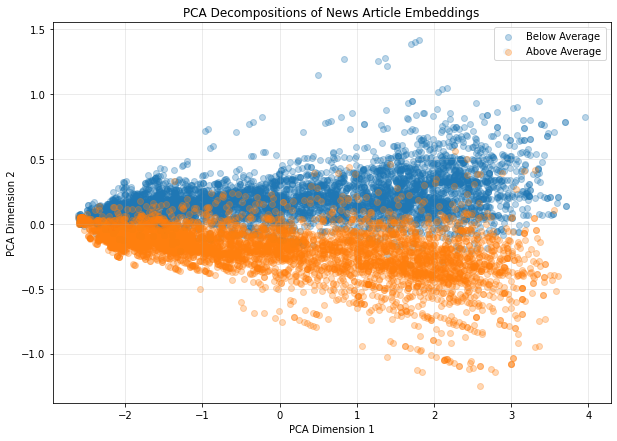

In [35]:
# Set number of components to 2 so we can visualize embeddings in a 2D plot
n_components = 2   

# Instantiate PCA model
pca = PCA(n_components=n_components)

# Transform embeddings using PCA
pca_embeddings = pca.fit_transform(embeddings_test)

# Create labels dictionary
labels_dict = {0: 'Below Average', 1: 'Above Average'}

# Plot PCA decomposition of word embeddings - color code according to topic
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
for i in range(NUM_OUTPUTS):
    ax1.scatter(pca_embeddings[np.where(labels_test==i), 0], pca_embeddings[np.where(labels_test==i), 1],
                alpha=0.3, label=labels_dict[i])
ax1.set_xlabel('PCA Dimension 1')
ax1.set_ylabel('PCA Dimension 2')
ax1.set_title('PCA Decompositions of News Article Embeddings')
ax1.grid(alpha=0.3)
ax1.legend(loc='upper right')

# Display plot
plt.show()

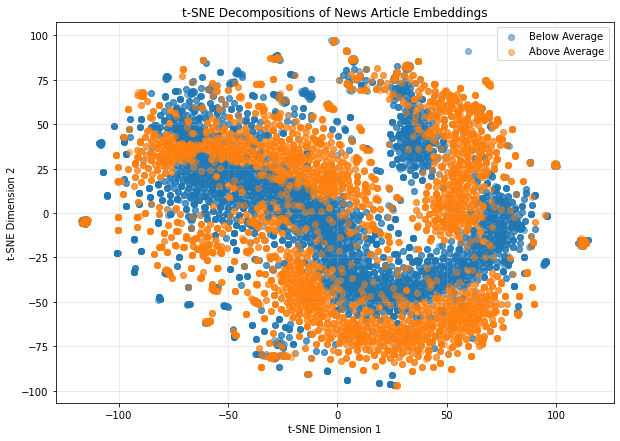

In [36]:
# Set number of components to 2 so we can visualize embeddings in a 2D plot
n_components = 2

# Instantiate t-SNE model
tsne = TSNE(n_components=n_components, random_state=0)

# Transform embeddings using t-SNE
tsne_embeddings = tsne.fit_transform(embeddings_test)

# Plot PCA decomposition of word embeddings - color code according to topic
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
for i in range(NUM_OUTPUTS):
    ax1.scatter(tsne_embeddings[np.where(labels_test==i), 0], tsne_embeddings[np.where(labels_test==i), 1],
                alpha=0.5, label=labels_dict[i])
ax1.set_xlabel('t-SNE Dimension 1')
ax1.set_ylabel('t-SNE Dimension 2')
ax1.set_title('t-SNE Decompositions of News Article Embeddings')
ax1.grid(alpha=0.3)
ax1.legend(loc='upper right')

# Display plot
plt.show()

In [37]:
# Instantiate model
modelTitles = SWEM(vocab_size=VOCAB_SIZE_TITLES, embedding_size=EMBED_DIM, hidden_dim=HIDDEN_DIM, num_outputs=NUM_OUTPUTS)

# Binary cross-entropy (BCE) Loss and Adam Optimizer
lr = 1e-3
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelTitles.parameters(), lr=lr)

# Number of training epochs
n_epochs = 20
n_steps = 100

# Iterate through train set minibatchs
print('Training SWEM model...\n')
modelTitles.train()
for epoch in range(n_epochs):
    # Initialize sums
    correct_sum = 0
    num_examples_sum = 0
    loss_sum = 0
    
    # Iterate over number of training examples
    step_counter = 0
    for inputs, labels in TitlesTrainLoader:
        # Zero out the gradients
        optimizer.zero_grad()
        
        # Forward pass
        y_pred = modelTitles.forward(inputs)
        loss = criterion(y_pred, labels)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        # Update sums
        predictions = torch.argmax(y_pred, dim=1)
        correct_sum += torch.sum((predictions == labels).float()).item()
        num_examples_sum += len(labels)
        loss_sum += loss.item()

        # Increment step counter
        if step_counter is not None:
            step_counter += 1
            if step_counter >= n_steps:
                break

    # Calculate epoch metrics
    acc_epoch = correct_sum / num_examples_sum
    loss_epoch = loss_sum / num_examples_sum

    # Display results
    print('  >> Epoch %d:  loss=%.4f, acc=%.4f' % (epoch + 1, loss_epoch, acc_epoch))

# Training complete
print('\nTraining complete.\n')

# Evaluate on test set
modelTitles.eval()
correct_sum = 0
num_examples_sum = 0
loss_sum = 0
print('Evaluating model on test set...')
with torch.no_grad():
    # Iterate over number of training examples
    for inputs, labels in TitlesTestLoader:
        # Forward pass
        y_pred = modelTitles(inputs)
        
        # Update sums
        predictions = torch.argmax(y_pred, dim=1)
        correct_sum += torch.sum((predictions == labels).float()).item()
        num_examples_sum += len(labels)
    
# Calculate epoch metrics
print('Test set evaluation complete.\n')
test_acc = correct_sum / num_examples_sum

# Display results
print('Test accuracy:  %.4f\n' % (test_acc))

Training SWEM model...

  >> Epoch 1:  loss=0.0054, acc=0.5348
  >> Epoch 2:  loss=0.0053, acc=0.6074
  >> Epoch 3:  loss=0.0049, acc=0.6771
  >> Epoch 4:  loss=0.0042, acc=0.7465
  >> Epoch 5:  loss=0.0035, acc=0.7958
  >> Epoch 6:  loss=0.0030, acc=0.8362
  >> Epoch 7:  loss=0.0026, acc=0.8633
  >> Epoch 8:  loss=0.0023, acc=0.8853
  >> Epoch 9:  loss=0.0021, acc=0.8980
  >> Epoch 10:  loss=0.0019, acc=0.9111
  >> Epoch 11:  loss=0.0017, acc=0.9222
  >> Epoch 12:  loss=0.0015, acc=0.9305
  >> Epoch 13:  loss=0.0014, acc=0.9407
  >> Epoch 14:  loss=0.0013, acc=0.9395
  >> Epoch 15:  loss=0.0012, acc=0.9480
  >> Epoch 16:  loss=0.0012, acc=0.9504
  >> Epoch 17:  loss=0.0011, acc=0.9504
  >> Epoch 18:  loss=0.0010, acc=0.9593
  >> Epoch 19:  loss=0.0010, acc=0.9580
  >> Epoch 20:  loss=0.0010, acc=0.9593

Training complete.

Evaluating model on test set...
Test set evaluation complete.

Test accuracy:  0.9428



In [38]:
# Put model in evaluation mode
modelTitles.eval()

# Don't calculate gradients - this speeds up inference and decreases memory requirements
with torch.no_grad():
    # Initialize array variables
    embeddings_test = None
    labels_test = None
    
    # Iterate over number of test examples
    for inputs, labels in TitlesTestLoader:
        # Retrieve trained embeddings for each test set example
        embeddings_batch = modelTitles.get_embeddings(inputs)
        embeddings_batch = embeddings_batch.detach().cpu().numpy()
        labels = labels.detach().cpu().numpy()

        # Concatenate embeddings and labels to arrays
        if labels_test is None:
            embeddings_test = embeddings_batch
            labels_test = labels
        else:
            embeddings_test = np.concatenate((embeddings_test, embeddings_batch), axis=0)
            labels_test = np.concatenate((labels_test, labels), axis=0)

# Display array sizes
print('Embeddings size:  (%d, %d)' % (embeddings_test.shape))
print('Labels size:  (%d, %d)' % (embeddings_test.shape))

Embeddings size:  (10142, 50)
Labels size:  (10142, 50)


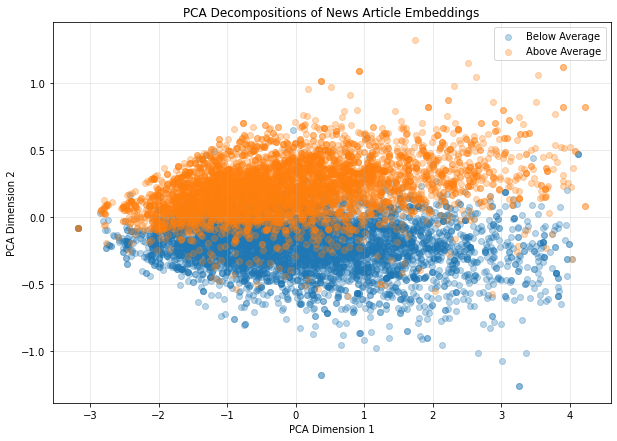

In [39]:
# Set number of components to 2 so we can visualize embeddings in a 2D plot
n_components = 2   

# Instantiate PCA model
pca = PCA(n_components=n_components)

# Transform embeddings using PCA
pca_embeddings = pca.fit_transform(embeddings_test)

# Create labels dictionary
labels_dict = {0: 'Below Average', 1: 'Above Average'}

# Plot PCA decomposition of word embeddings - color code according to topic
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
for i in range(NUM_OUTPUTS):
    ax1.scatter(pca_embeddings[np.where(labels_test==i), 0], pca_embeddings[np.where(labels_test==i), 1],
                alpha=0.3, label=labels_dict[i])
ax1.set_xlabel('PCA Dimension 1')
ax1.set_ylabel('PCA Dimension 2')
ax1.set_title('PCA Decompositions of News Article Embeddings')
ax1.grid(alpha=0.3)
ax1.legend(loc='upper right')

# Display plot
plt.show()

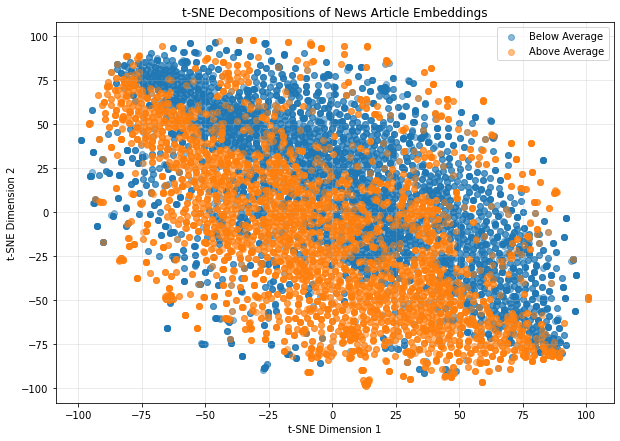

In [40]:
# Set number of components to 2 so we can visualize embeddings in a 2D plot
n_components = 2

# Instantiate t-SNE model
tsne = TSNE(n_components=n_components, random_state=0)

# Transform embeddings using t-SNE
tsne_embeddings = tsne.fit_transform(embeddings_test)

# Plot PCA decomposition of word embeddings - color code according to topic
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
for i in range(NUM_OUTPUTS):
    ax1.scatter(tsne_embeddings[np.where(labels_test==i), 0], tsne_embeddings[np.where(labels_test==i), 1],
                alpha=0.5, label=labels_dict[i])
ax1.set_xlabel('t-SNE Dimension 1')
ax1.set_ylabel('t-SNE Dimension 2')
ax1.set_title('t-SNE Decompositions of News Article Embeddings')
ax1.grid(alpha=0.3)
ax1.legend(loc='upper right')

# Display plot
plt.show()